In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [49]:
#import dataset
df=pd.read_csv('../data-wrangling/suicide_unemployment_depresion.csv', index_col=0)

In [50]:
#converting year to datetime

df['year']=pd.to_datetime(df['year'], format='%Y')

In [51]:
df['country'].unique()

array(['Antigua and Barbuda', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Bahrain', 'Barbados', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Dominica', 'Ecuador',
       'France', 'Greece', 'Grenada', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Kuwait', 'Luxembourg', 'Malta',
       'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Panama',
       'Paraguay', 'Portugal', 'Puerto Rico', 'Republic of Korea',
       'Saint Vincent and Grenadines', 'Seychelles', 'Singapore', 'Spain',
       'Sri Lanka', 'Suriname', 'Thailand', 'Trinidad and Tobago',
       'United Kingdom', 'United States', 'Uruguay', 'Belize',
       'Guatemala', 'Norway', 'Saint Lucia', 'Albania', 'Finland',
       'Sweden', 'Turkmenistan', 'Ukraine', 'Guyana', 'Romania',
       'Russian Federation', 'Armenia', 'Azerbaijan', 'Belarus',
       'Czech Republic', 'El Salvador', 'Georgia', 'Germany',
       'Kazakhstan', 'Kyrgyzstan', 'Poland',

In [52]:
# A function to select one or multiple countries and loc the data from the list given.

def data_country(country):
    i=pd.concat([df.loc[df['country']==i] for i in country])
    return i

In [53]:
# function to compare ratio between male and female
def ratio_FM(country):
    
    #table for female
    f=data_country(country).loc[data_country(country)['sex']=='female']
    #table for male
    m=data_country(country).loc[data_country(country)['sex']=='male']
    #join them
    i=pd.merge(f, m,  how='left', left_on=['country','year'], 
                          right_on = ['country','year'])
    
    #create the ratios
    i['ratio_suicide']=abs(i['suicides_per_100K_y']/i['suicides_per_100K_x'])
    i['ratio_depression']=abs(i['depression_rate_y']/i['depression_rate_x'])
    i['ratio_unemployment']=i['unemployment_y']-i['unemployment_x']
    
    return i[['year','country','gdp_for_year($)_y','HDIforyear_y','suicides_per_100K_y','suicides_per_100K_x','gdp_per_capita($)_y','ratio_suicide','ratio_depression','unemployment_y','unemployment_x']].copy()

    

In [55]:
#give a list of countries to plot gender differences

def plot_ratios(country):

    fig, ax1 = plt.subplots(figsize=(20,10))
    
    fig.subplots_adjust(right=0.8)

    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    
    ax3.spines["right"].set_position(("axes", 1.1))
    
    df=ratio_FM(country)
    
    ax1.plot(df['year'], df['ratio_suicide'], 'r-',label="ratio_suicide",linewidth=4)

    #(% of the labor force)    
    ax2.plot(df['year'], df['ratio_depression'], color='grey', label="ratio_depression",linewidth=2,linestyle='-') 
    
    ax3.plot(df['year'], df['unemployment_x'],color='magenta',label="unemployment_women",linestyle='--')
    ax3.plot(df['year'], df['unemployment_y'],color='deepskyblue',label="unemployment_men",linestyle='--')
    
    ax1.set_xlabel("Year")
    ax1.set_ylabel("ratio_suicide")
    ax2.set_ylabel("ratio_depression")
    ax3.set_ylabel("ratio_unemployment")
    
    ax1.yaxis.label.set_color('red')
    ax2.yaxis.label.set_color('grey')
    ax3.yaxis.label.set_color('m')

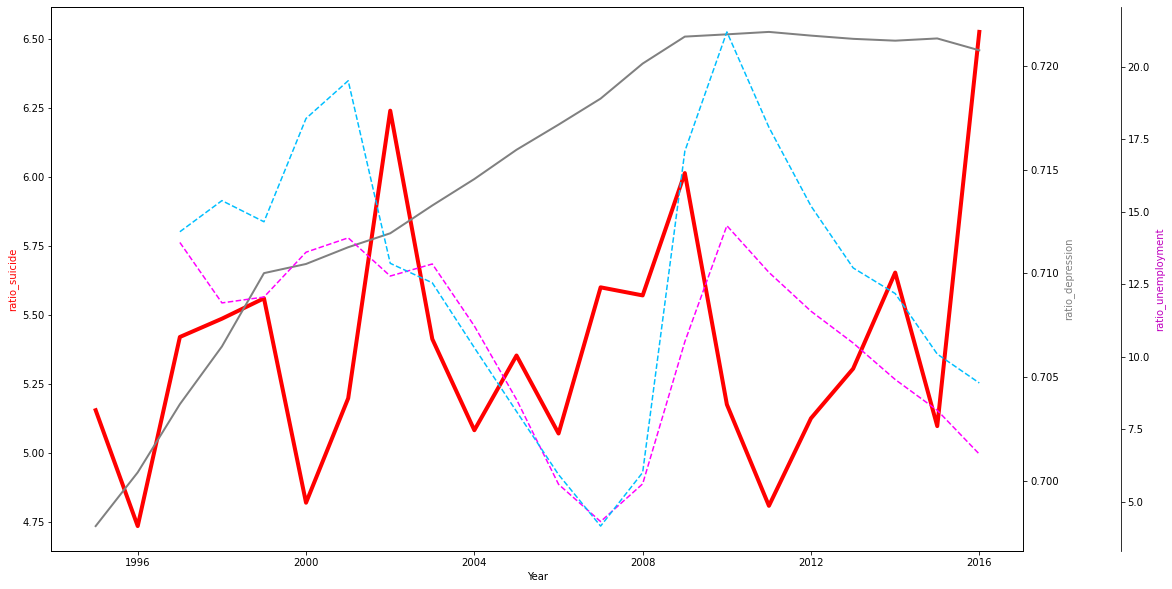

In [69]:
# plot ratios between male and female in suicide rates and depression rates

plot_ratios(['Lithuania'])

In [34]:
#building the model and see the coeficients



def model_country(country):
    df=ratio_FM(country).dropna()
    df = sm.add_constant(df)
    y = df['ratio_suicide']
    X = df[[ 'const','unemployment_x','unemployment_y', 'ratio_depression']]
    lin_reg = sm.OLS(y, X).fit()
    return lin_reg.summary()

In [58]:
#try regression model for ex soviet union coutries

model_country(['Ukraine', 'Belarus', 'Russian Federation', 'Lithuania','Latvia','Estonia'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ratio_suicide   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     4.536
Date:                Thu, 17 Sep 2020   Prob (F-statistic):             0.0110
Time:                        16:57:29   Log-Likelihood:                -27.548
No. Observations:                  30   AIC:                             63.10
Df Residuals:                      26   BIC:                             68.70
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5426      1.718     -0.316      0.755      -4.075       2.990
unemployment_x      -0.0971      0.127     -0.764      0.452      -0.359       0.164
unemployment_y       0.0563      0.093      0.609      0.548      -0.134       0.247
ratio_depression     8.7249      2.449      3.562      0.001       3.690      13.760
==============================================================================
Omnibus:                        4.532   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                2.995
Skew:                           0.717   Prob(JB):                        0.224
Kurtosis:                       3.582   Cond. No.                         412.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
### per year

In [17]:
def data_year(year):
    i=df.loc[df['year']==pd.to_datetime(year, format='%Y')]
    return i

In [37]:
data_year('1996')

,year,country,sex,suicides_no,population,HDIforyear,gdp_for_year($),gdp_per_capita($),unemployment,depression_rate,suicides_per_100K
1310,1996-01-01,Albania,female,39,1496000,NaN,3314898292,1127,13.600000,2.693542,2.606952
1311,1996-01-01,Albania,male,50,1444200,NaN,3314898292,1127,11.400000,1.616876,3.462124
1312,1996-01-01,Argentina,female,532,16252800,NaN,272149750000,8563,19.309999,4.542759,3.273282
1313,1996-01-01,Argentina,male,1697,15527900,NaN,272149750000,8563,15.730000,2.629910,10.928715
1314,1996-01-01,Armenia,female,24,1807800,NaN,1596968913,458,15.200000,3.113436,1.327580
...,...,...,...,...,...,...,...,...,...,...,...
1459,1996-01-01,United States,male,24980,119942600,NaN,8100201000000,32928,5.435300,3.512402,20.826629
1460,1996-01-01,Uruguay,female,86,1537456,NaN,20515543039,6914,NaN,4.097826,5.593656
1461,1996-01-01,Uruguay,male,307,1429822,NaN,20515543039,6914,NaN,2.477654,21.471204
1462,1996-01-01,Uzbekistan,female,367,10041800,NaN,13948892216,703,NaN,3.453355,3.654723


In [59]:
# compare suicides rates with other variables  given the year

def plot_gdp_suicide(year):
    fig, ax = plt.subplots(figsize=(10,10))

    ax = sns.scatterplot(x=data_year(year)['HDIforyear'],
                         y=data_year(year)['suicides_per_100K'],
                         hue=data_year(year)['sex'], data=data_year(year))
    
    plt.title(f'Suicide rating with Human development Index in :{year}')
    
    #store the image
    plt.savefig(f'../ploting/suicides_HDI_{year}.png')
    
    fig, ax2 = plt.subplots(figsize=(10,10)) 
    
    ax2 = sns.scatterplot(x=data_year(year)['gdp_for_year($)'],
                        y=data_year(year)['suicides_per_100K'],
                         hue=data_year(year)['sex'], data=data_year(year))
    plt.xscale('log')
    
    plt.title(f'Suicide rating with country GDP in :{year}')
    
    #store the image
    plt.savefig(f'../ploting/suicides_GDP_{year}.png')
    
    ax.set_xlabel("HDIforyear")
    ax.set_ylabel("suicides_per_100Ks")

    fig, ax2 = plt.subplots(figsize=(10,10)) 
    
    ax3 = sns.scatterplot(x=data_year(year)['depression_rate'],
                        y=data_year(year)['suicides_per_100K'],
                         hue=data_year(year)['sex'], data=data_year(year))
    
    plt.title(f'Suicide rating with depression in :{year}')
    
    #store the image
    plt.savefig(f'../ploting/suicides_depression_{year}.png')
    


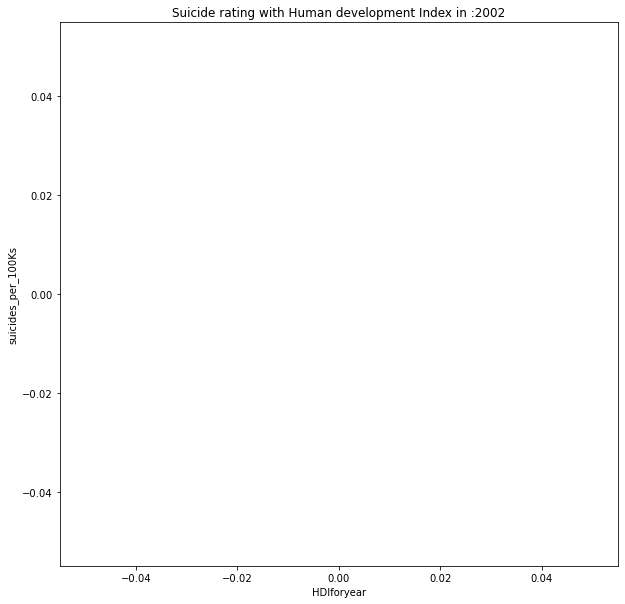

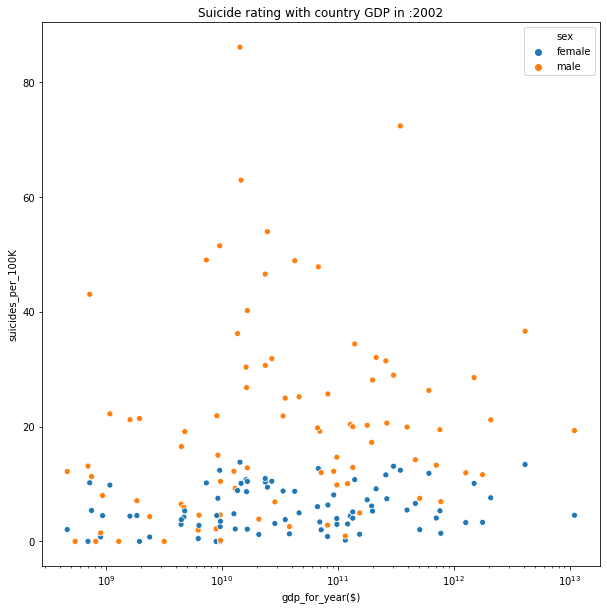

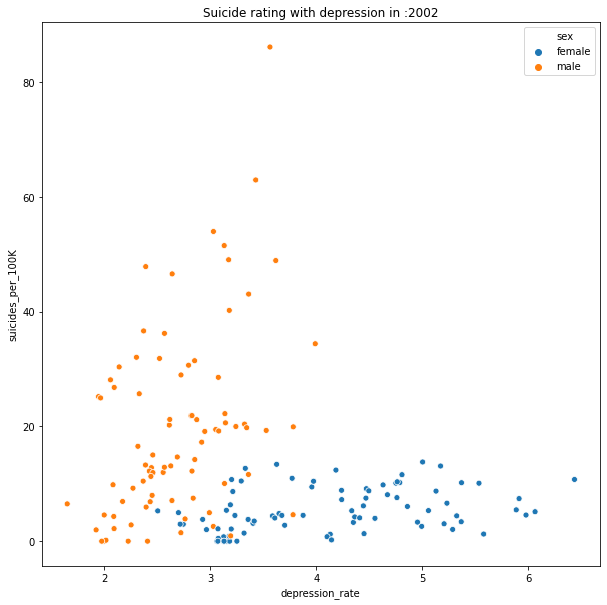

In [61]:
plot_gdp_suicide('2002')

In [62]:
# function to create ratios

def year_country_gdp(year):
    
    #table for female
    f=data_year(year).loc[data_year(year)['sex']=='female']
    #table for male
    m=data_year(year).loc[data_year(year)['sex']=='male']
    #join them
    i=pd.merge(f, m,  how='left', left_on=['country','year'], 
                          right_on = ['country','year'])
    
    #create the ratios
    i['suicide_ratio']=abs(i['suicides_per_100K_y']-i['suicides_per_100K_x'])
    i['ratio_depression']=abs(i['depression_rate_y']-i['depression_rate_x'])
    i['ratio_unemployment']=i['unemployment_y']-i['unemployment_x']
    
    return i[['year','country','gdp_per_capita($)_y','suicides_per_100K_y','suicides_per_100K_x','suicide_ratio','ratio_depression','unemployment_y','unemployment_x']].copy()
    

In [63]:
year_country_gdp('2006')

,year,country,gdp_per_capita($)_y,suicides_per_100K_y,suicides_per_100K_x,suicide_ratio,ratio_depression,unemployment_y,unemployment_x
0,2006-01-01,Albania,3235,0.000000,0.000000,0.000000,1.103156,11.8000,16.799999
1,2006-01-01,Antigua and Barbuda,14114,0.000000,0.000000,0.000000,1.064279,NaN,NaN
2,2006-01-01,Argentina,6475,14.264295,3.322358,10.941937,1.850972,8.3622,12.340800
3,2006-01-01,Armenia,2310,4.741750,1.150241,3.591508,0.982116,NaN,NaN
4,2006-01-01,Aruba,25622,15.654702,4.016629,11.638073,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
80,2006-01-01,Ukraine,2418,40.583394,7.105431,33.477963,1.477623,7.0047,6.603100
81,2006-01-01,United Arab Emirates,45110,2.119836,1.045794,1.074042,0.960603,NaN,NaN
82,2006-01-01,United Kingdom,47163,11.417815,3.206867,8.210948,1.559905,5.6934,4.945500
83,2006-01-01,United States,49666,19.187222,4.927051,14.260171,2.512669,4.6193,4.627400


In [72]:
#building the model and see the coeficients



def model_per_year(year):
    
    df=year_country_gdp(year).dropna()
    df = sm.add_constant(df)
    y = df['suicides_per_100K_y']
    X = df[[ 'const','unemployment_y', 'ratio_depression']]
    lin_reg = sm.OLS(y, X).fit()
    return lin_reg.summary()


# choose a year
model_per_year('2002')

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     suicides_per_100K_y   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                 -0.031
Method:                  Least Squares   F-statistic:                   0.05415
Date:                 Thu, 17 Sep 2020   Prob (F-statistic):              0.947
Time:                         18:01:54   Log-Likelihood:                -265.58
No. Observations:                   63   AIC:                             537.2
Df Residuals:                       60   BIC:                             543.6
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               24.9646      8.122      3.074      0.003       8.717      41.212
unemployment_y      -0.1098      0.470     -0.234      0.816      -1.049       0.830
ratio_depression    -1.0768      3.615     -0.298      0.767      -8.308       6.155
==============================================================================
Omnibus:                       21.905   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.505
Skew:                           1.302   Prob(JB):                     8.74e-08
Kurtosis:                       5.366   Cond. No.                         40.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""